# NPLM Visualization

## Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import ScalarFormatter

from NPLM.PLOTutils import *
from NPLM.ANALYSISutils import *

%load_ext autoreload
%autoreload 1
%aimport modules.plot_utils
%aimport modules.analysis_utils
%aimport modules.DataReader



import warnings
warnings.filterwarnings("ignore", message=r"elementwise", category=FutureWarning)

## Functions

In [2]:
def read_data(file_name, n_data):
    '''legge la distribuzione da un file'''
    return modules.DataReader.DataReader(filename=file_name).build_sample(ndata=n_data)

def read_data_cut(file_name, n_data, theta1 = None, theta2 = None):
    """reads data file and perform cuts on theta"""
    Reader = modules.DataReader.DataReader(filename=file_name)
    df_cut = Reader.cut_theta(ndata=n_data, theta1=theta1, theta2=theta2)
    return df_cut

## Constants

In [5]:
N_REF           = 200000
N_BKG           = 10000
N_SIG           = 0
N_DATA          = N_BKG + N_SIG

DATA_FOLDER    = "../data/"

REFERENCE_RUN  = "0054"
DATA_RUN       = "0057"
REFERENCE_FILE = f"RUN00{REFERENCE_RUN}_channels.h5"
DATA_FILE      = f"RUN00{DATA_RUN}_channels.h5"

FEATURES       = ["drift_time", "theta"]

# Full Datasets

In [6]:
df_ref  = read_data_cut(DATA_FOLDER+REFERENCE_FILE, n_data=0, theta1=0, theta2=55)
df_data = read_data_cut(DATA_FOLDER+DATA_FILE,      n_data=0, theta1=0, theta2=55)

weightsData = np.ones(df_data.shape[0])
weightsRef  = np.ones(df_ref.shape[0])*df_data.shape[0]*1./df_ref.shape[0]

weights = [weightsRef, weightsData]

print("\nREFERENCE:\n")
print("Number of hits:",     df_ref.shape[0])
print("Number of features:", df_ref.shape[1])
print("Features:",      list(df_ref.columns))

print("\nDATA:\n")
print("Number of hits:",     df_data.shape[0])
print("Number of features:", df_data.shape[1])
print("Features:",      list(df_data.columns))

theta < 55
theta < 55

REFERENCE:

Number of hits: 1013442
Number of features: 2
Features: ['drift_time', 'theta']

DATA:

Number of hits: 464484
Number of features: 2
Features: ['drift_time', 'theta']


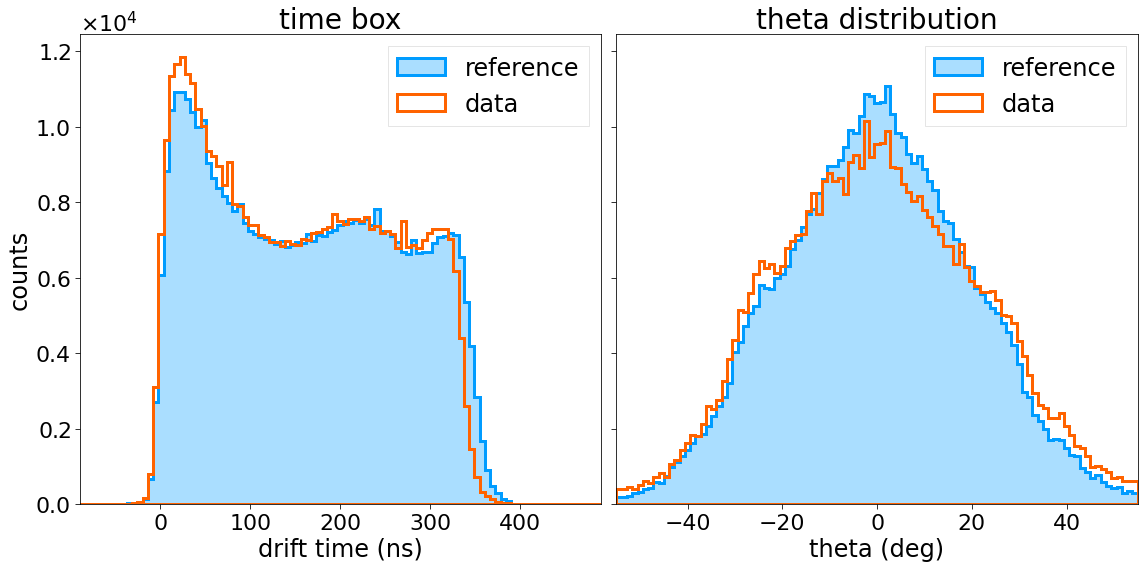

In [33]:
# BINS:
# drift time
dt_bins    = np.linspace(-90, 490, 100)
# theta
theta_bins = np.linspace(-55, 55, 100)

BINS = [dt_bins, theta_bins]

# fig, ax = modules.plot_utils.plot_full_dataset(df_ref, FEATURES, BINS)
# fig.suptitle("Reference", fontsize=32)
# fig.tight_layout()
# fig.savefig("./plots/reference.png", dpi = 300, facecolor='white')
# plt.show()
# fig, ax = modules.plot_utils.plot_full_dataset(df_data, FEATURES, BINS)
# fig.suptitle("Data", fontsize=32)
# fig.tight_layout()
# fig.savefig("./plots/data.png", dpi = 300, facecolor='white')
# plt.show()

# REFERENCE VS DATA
fig, ax = modules.plot_utils.plot_full_dataset_2(df_ref, df_data, FEATURES, BINS, weights)
fig.tight_layout()
fig.savefig("./plots/ref-vs-data.png", dpi = 300, facecolor='white')
plt.show()

# fig, ax = modules.plot_utils.plot_full_scatter(df_ref, FEATURES)
# fig.suptitle("Reference", fontsize=32)
# plt.show()
# fig, ax = modules.plot_utils.plot_full_scatter(df_data, FEATURES)
# fig.suptitle("Data", fontsize=32)
# plt.show()

## NPLM Datasets

In [12]:
# BINS:
# drift time
dt_bins    = np.linspace(-90, 490, 100)
# theta
theta_bins = np.linspace(-80, 80, 100)

BINS = [dt_bins, theta_bins]

theta1 = 0
theta2 = 55


DATA = read_data_cut(file_name=DATA_FOLDER+DATA_FILE,      n_data=N_DATA, theta1=theta1, theta2=theta2)
REF  = read_data_cut(file_name=DATA_FOLDER+REFERENCE_FILE, n_data=N_REF,  theta1=0,      theta2=55)

weightsData = np.ones(DATA.shape[0])
weightsRef  = np.ones(REF.shape[0])*N_DATA*1./N_REF

weights = [weightsRef, weightsData]

theta < 55
theta < 55


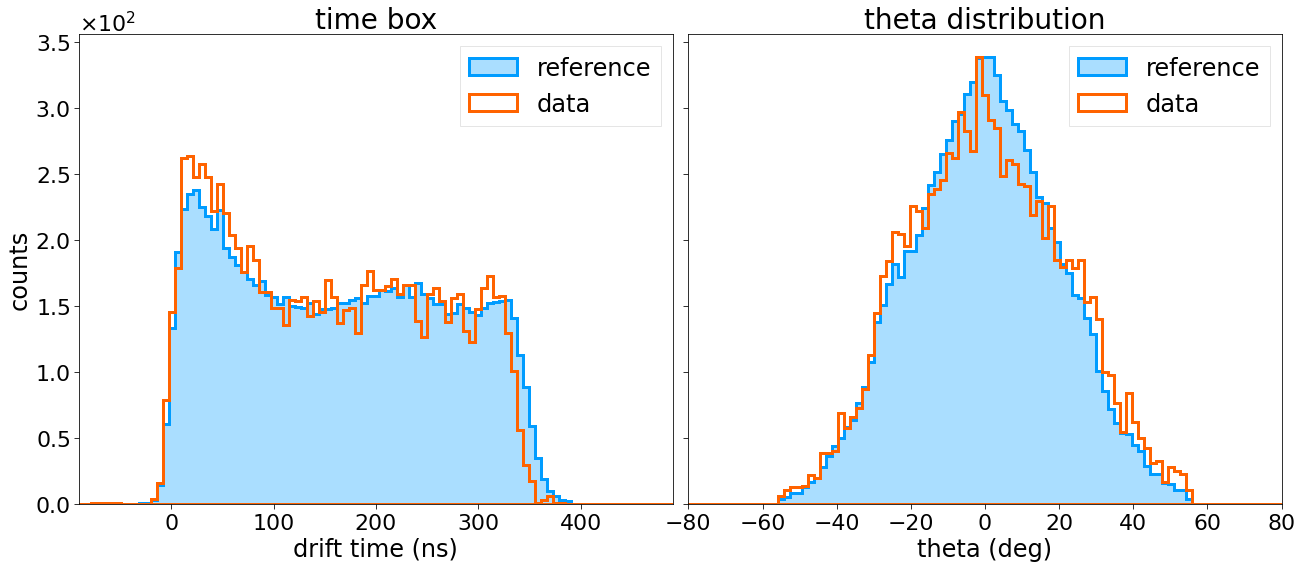

In [17]:
fig, ax = modules.plot_utils.plot_ref_data_1(REF, DATA, FEATURES, BINS, weights)